# ELE 435/535 Lab 7: Support Vector Machines

### Due Date : 11/10 Wednesday 11:59 PM

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

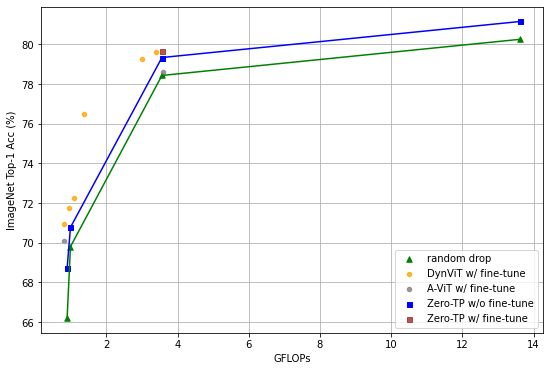

In [8]:
ZeroTP = np.array([[13.628, 81.158], [3.558, 79.34], [0.988, 70.778], [0.894, 68.72]])
ZeroTP_tuned = np.array([[3.558, 79.68]])

DynViT_no_tuned = np.array([[13.628, 80.26], [3.558, 78.436], [0.988, 69.806], [0.894, 66.21]])
DynViT = np.array([[3.4, 79.6], [2.988, 79.272], [1.379, 76.502], [1.096, 72.256], [0.936, 71.752], [0.805, 70.924]])
AViT = np.array([[0.8, 70.1], [3.6, 78.6]])

fig, ax = plt.subplots(figsize = (9,6))

plt.scatter(DynViT_no_tuned[:,0], DynViT_no_tuned[:,1], s=30, alpha=1, color='green', marker='^', label='random drop')
plt.plot(DynViT_no_tuned[:,0], DynViT_no_tuned[:,1], color='green')

plt.scatter(DynViT[:,0], DynViT[:,1], s=20, alpha=0.8, color='orange', label='DynViT w/ fine-tune')
#plt.plot(DynViT[:,0], DynViT[:,1])
plt.scatter(AViT[:,0], AViT[:,1], s=20, alpha=0.8, color='grey', label='A-ViT w/ fine-tune')
#plt.plot(AViT[:,0], AViT[:,1])

plt.scatter(ZeroTP[:,0], ZeroTP[:,1], s=25, alpha=1, color='blue', marker='s', label='Zero-TP w/o fine-tune')
plt.plot(ZeroTP[:,0], ZeroTP[:,1], color='blue')
plt.scatter(ZeroTP_tuned[:,0], ZeroTP_tuned[:,1], s=25, alpha=0.8, color='brown', marker='s', label='Zero-TP w/ fine-tune')
#plt.plot(ZeroTP_tuned[:,0], ZeroTP_tuned[:,1])

plt.xlabel("GFLOPs")
plt.ylabel("ImageNet Top-1 Acc (%)")

plt.grid()
plt.legend()

plt.savefig('acc_flops.png')
plt.show()

In [2]:
# The following code is provided for use in this HW
# It generates nx labelled examples from each of two bi-variate Gaussian densities. 
#----------------------------------------------------------------------------------
def multinormaldata(nx, mu1, cov1, mu2, cov2):
    D = np.zeros((2*nx,2), float)
    D[0:nx,:] = np.random.multivariate_normal(mu1, cov1, nx)
    D[nx:2*nx,:] = np.random.multivariate_normal(mu2, cov2, nx)
    y = np.ones(2*nx, int)
    y[0:nx] = -np.ones(nx, int)
    return D, y

## 1. Linear Support Vector Machine

**1.1) Generate a total of 100 samples from two 2D Gaussian densities.**  
a) Let $\mu_1 = (1,1)$ and $\mu_2 = (-1, -1)$ and $\Sigma_1 = \Sigma_2 = I_2$.  
b) Store the samples in a data matrix $X$ and labels in a vector $y$.    
c) Plot the labelled points in the 2D plane. Use color coding and marker shape to distinguish the two labels.

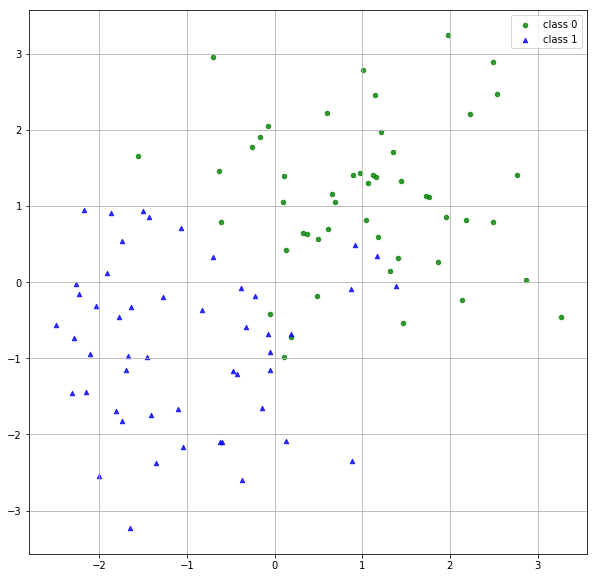

In [3]:
# Generate binary class dataset
np.random.seed(0)
#--------------------------------

mu1 = [1,1]
mu2 = [-1,-1]
cov1 = np.eye(2)
cov2 = np.eye(2)
nx = 50

X, y = multinormaldata(nx, mu1, cov1, mu2, cov2)

fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(X[0:nx,0], X[0:nx,1], s=20, alpha=0.8, color='green', label='class 0')
plt.scatter(X[nx:2*nx,0], X[nx:2*nx,1], s=20, alpha=0.8, color='blue', label='class 1', marker='^')
plt.grid()
plt.legend()
plt.show()

**1.2) Train a linear support vector machine on the data using $C=1$.**  
a) Plot the separating hyperplane (a line) that separates the two classes (use a solid line).  
b) Plot the two hyperlanes $w^Tx +b = \pm 1$ (use dashed lines).
c) Mark the support vectors using a circle around each one.

**Note:** Use scikit-learn SVC. When you use SVC, make sure you specify a linear kernel by SVC(kernel='linear'...).

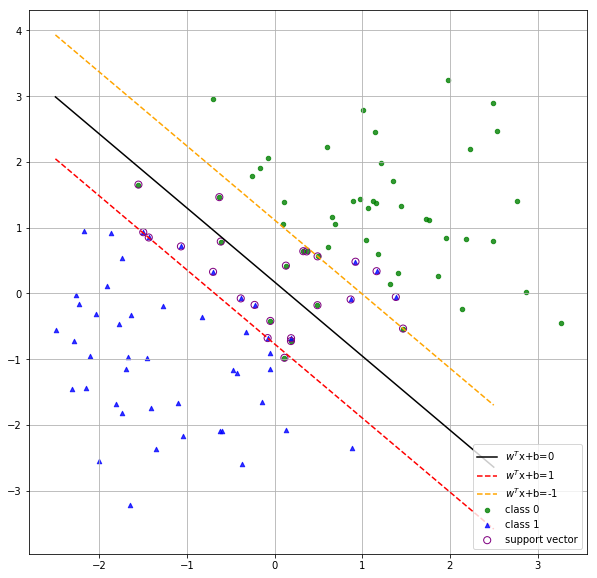

In [4]:
from sklearn import svm
#-------------------------

clf  = svm.SVC(kernel='linear',C=1).fit(X, y)
w = clf.coef_[0]
b = clf.intercept_

x_plot = np.linspace(-2.5,2.5,300)
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(X[0:nx,0], X[0:nx,1], s=20, alpha=0.8, color='green', label='class 0')
plt.scatter(X[nx:2*nx,0], X[nx:2*nx,1], s=20, alpha=0.8, color='blue', label='class 1', marker='^')
plt.scatter(X[clf.support_,0], X[clf.support_,1], s=50, alpha=1, color='', marker='o', edgecolors='purple', label='support vector')
plt.plot(x_plot, [-(b+w[0]*x)/w[1] for x in x_plot], color='black', label='$w^T$x+b=0')
plt.plot(x_plot, [(1-b-w[0]*x)/w[1] for x in x_plot], color='red', linestyle='--', label='$w^T$x+b=1')
plt.plot(x_plot, [(-1-b-w[0]*x)/w[1] for x in x_plot], color='orange', linestyle='--', label='$w^T$x+b=-1')
plt.grid()
plt.legend(loc=4)
plt.show()

**1.3) Repeat 2) using a set of values of $C$ ($10^{-3}$ ~$10^5$).**  
a) do the same plot as 2) but include all of the hyperplanes for various $C$ (leave out the \pm 1 hyperplanes).  
b) On a separate plot, plot the number of support vectors vs. $C$ (plot x-axis on a log scale).  
c) How does the number of support vectors change as $C$ increases and why does it change in that way? 


ANS: The number of support vectors decreases, but when $C$ is large enough (e.g. $C\ge$10), the number of support vectors doesn't change. For most support vectors, $s_j>0$. As $C$ increases, it is more and more important to decrease the sum of $\{s_j\}$ in the objective function, so the number of support vectors decreases. When C is very large, considering that the data is not linearly separable, the number of support vectors has already been minimized, so the number of support vectors doesn't change anymore as $C$ increases.

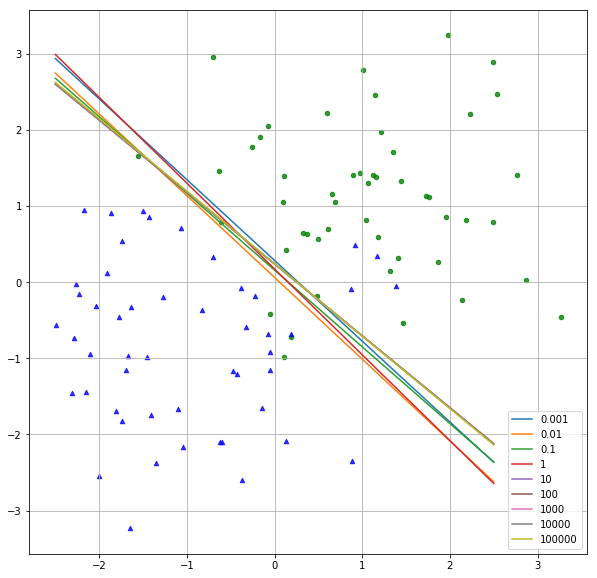

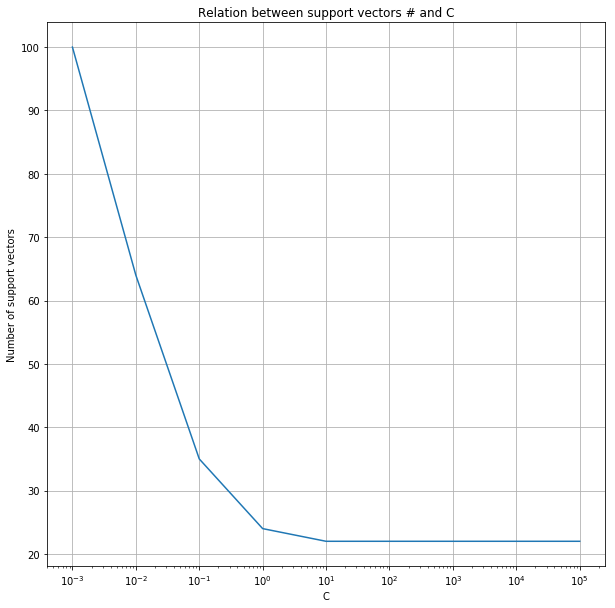

In [6]:
# Your code here

C_list = [1e-3,1e-2, 1e-1, 1, 10, 10**2, 10**3, 10**4, 10**5]
x_plot = np.linspace(-2.5,2.5,300)
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(X[0:nx,0], X[0:nx,1], s=20, alpha=0.8, color='green')
plt.scatter(X[nx:2*nx,0], X[nx:2*nx,1], s=20, alpha=0.8, color='blue', marker='^')

n_support = []

for Ci in C_list:
    clf = svm.SVC(kernel='linear',C=Ci).fit(X, y)
    w = clf.coef_[0]
    b = clf.intercept_
    n_support.append(np.sum(clf.n_support_))
    plt.plot(x_plot, [-(b+w[0]*x)/w[1] for x in x_plot], label=Ci)

plt.grid()
plt.legend(loc=4)
plt.show()

fig2, ax2 = plt.subplots(figsize = (10,10))
plt.plot(C_list, n_support)
ax2.set_xscale("log", basex=10)
plt.xlabel("C")
plt.title("Relation between support vectors # and C")
plt.ylabel("Number of support vectors")
plt.grid()
plt.show()

## 2. SVM with Linear and Quadratic Kernels

**2.1) Generate Data**  
(a) generate data as specified below.  
(b) plot the data, use a distinct color and marker shape for each class.  
(c) estimate the expected training classification accuracy of linear classifier (give your reasoning) 

ANS: The accuracy will be very low, which might be a little higher than 50%. Because the data can hardly be separated by a line. In a typical case, the data points in both classes are evenly divided into two parts by the separating line. After training and learning, the accuracy can be a little higher than 50%, but it won't be much higher than 50%.

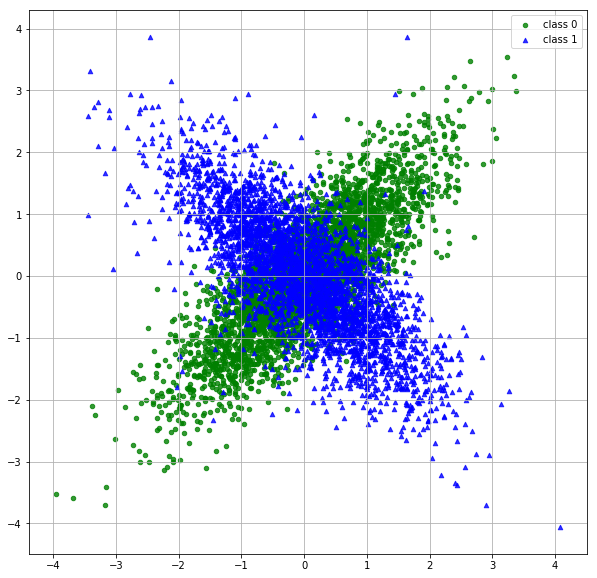

In [7]:
# Generate Training, Validation, and Testing Data
np.random.seed(31415926)
# generate data from two classes:
# first class mean1 = (0,0), Cov1 ~ sigma1 =1, sigma2=1, and correlation rho=0.8 
# second class mean2 = (0,0), Cov2 ~ sigma1 =1, sigma2=1, and correlation rho=-0.8

# generate 200 examples per class of training data and labels
# generate 200 examples per class of validation data and labels
# generate 3000 examples per class of testing data and labels
#----------------------------------------------------------------------------------

mu1 = [0,0]
mu2 = [0,0]
cov1 = [[1, 0.8], [0.8, 1]]
cov2 = [[1, -0.8], [-0.8, 1]]
ntr = 200
nval = 200
ntest = 3000

Xtr, ytr = multinormaldata(ntr, mu1, cov1, mu2, cov2)
Xval, yval = multinormaldata(nval, mu1, cov1, mu2, cov2)
Xtest, ytest = multinormaldata(ntest, mu1, cov1, mu2, cov2)

fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(Xtr[0:ntr,0], Xtr[0:ntr,1], s=20, alpha=0.8, color='green', label='class 0')
plt.scatter(Xval[0:nval,0], Xval[0:nval,1], s=20, alpha=0.8, color='green')
plt.scatter(Xtest[0:ntest,0], Xtest[0:ntest,1], s=20, alpha=0.8, color='green')
plt.scatter(Xtr[ntr:2*ntr,0], Xtr[ntr:2*ntr,1], s=20, alpha=0.8, color='blue', label='class 1', marker='^')
plt.scatter(Xval[nval:2*nval,0], Xtr[nval:2*nval,1], s=20, alpha=0.8, color='blue', marker='^')
plt.scatter(Xtest[ntest:2*ntest,0], Xtest[ntest:2*ntest,1], s=20, alpha=0.8, color='blue', marker='^')
plt.grid()
plt.legend()
plt.show()

**2.2) Train, validate, test a linear SVM**  
(a) For the range of values of $C=10^p$ where $p \in \{-4,...,3\}$, train a linear SVM and plot its training accuracy, validation accuracy, and testing accuracy versus $p$ all on the same plot. Print out the three testing accuracies (train, validate, test) for all $p$  
(b) Use the curve obtain in (a) to select a value of $C$. (Do not use the testing results!)  
(c) Train the linear SVM using the selected value of $C$ and BOTH the training abd validation data. On a new figure, plot the new training data (color and marker coded), the hyperplane and the two $\pm1 $ hyperplanes. Circle the support vectors.  
(d) Compute and print the new training and testing accuracy.

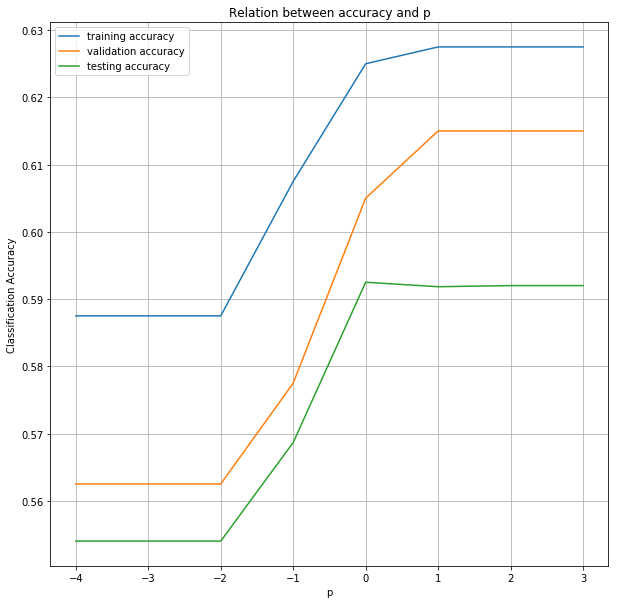

For p= -4
Training accuracy: 0.5875
Validation accuracy: 0.5625
Testing accuracy: 0.554
For p= -3
Training accuracy: 0.5875
Validation accuracy: 0.5625
Testing accuracy: 0.554
For p= -2
Training accuracy: 0.5875
Validation accuracy: 0.5625
Testing accuracy: 0.554
For p= -1
Training accuracy: 0.6075
Validation accuracy: 0.5775
Testing accuracy: 0.5686666666666667
For p= 0
Training accuracy: 0.625
Validation accuracy: 0.605
Testing accuracy: 0.5925
For p= 1
Training accuracy: 0.6275
Validation accuracy: 0.615
Testing accuracy: 0.5918333333333333
For p= 2
Training accuracy: 0.6275
Validation accuracy: 0.615
Testing accuracy: 0.592
For p= 3
Training accuracy: 0.6275
Validation accuracy: 0.615
Testing accuracy: 0.592


In [8]:
# Train linear SVM classifier over range of $C$

p_list = [-4, -3, -2, -1, 0, 1, 2, 3]

accuracy_tr = []
accuracy_val = []
accuracy_test = []

for p in p_list:
    clf = svm.SVC(kernel='linear',C=10**p).fit(Xtr, ytr)
    accuracy_tr.append(clf.score(Xtr, ytr))
    accuracy_val.append(clf.score(Xval, yval))
    accuracy_test.append(clf.score(Xtest, ytest))

fig, ax = plt.subplots(figsize = (10,10))
plt.plot(p_list, accuracy_tr, label='training accuracy')
plt.plot(p_list, accuracy_val, label='validation accuracy')
plt.plot(p_list, accuracy_test, label='testing accuracy')
plt.xlabel("p")
plt.title("Relation between accuracy and p")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.grid()
plt.show()

for i in range(len(p_list)):
    print('For p=', p_list[i])
    print('Training accuracy:', accuracy_tr[i])
    print('Validation accuracy:', accuracy_val[i])
    print('Testing accuracy:', accuracy_test[i])

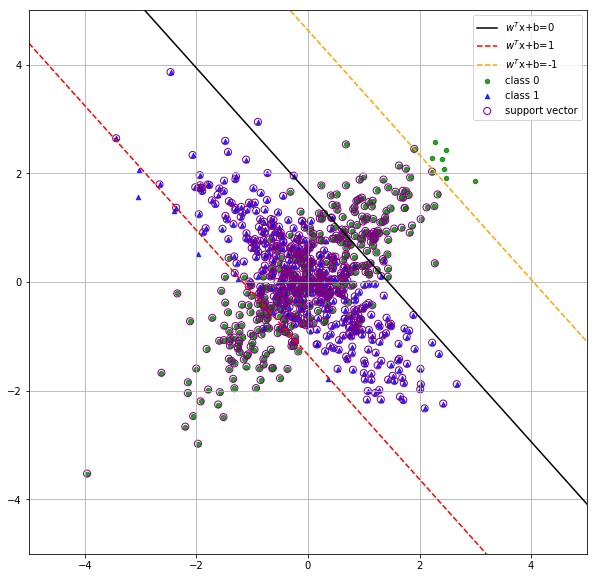

New training accuracy: 0.61875
New testing accuracy: 0.6016666666666667


In [9]:
# Train (using training and validation data) and test for the selected value of $C$

C_choose = 10 #choose p=1

Xtr_new = np.vstack((Xtr, Xval))
ytr_new = np.hstack((ytr, yval))

clf  = svm.SVC(kernel='linear',C=C_choose).fit(Xtr_new, ytr_new)
w = clf.coef_[0]
b = clf.intercept_

x_plot = np.linspace(-5,5,300)
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(Xtr[0:ntr,0], Xtr[0:ntr,1], s=20, alpha=0.8, color='green', label='class 0')
plt.scatter(Xval[0:nval,0], Xval[0:nval,1], s=20, alpha=0.8, color='green')
plt.scatter(Xtr[ntr:2*ntr,0], Xtr[ntr:2*ntr,1], s=20, alpha=0.8, color='blue', label='class 1', marker='^')
plt.scatter(Xval[nval:2*nval,0], Xval[nval:2*nval,1], s=20, alpha=0.8, color='blue', marker='^')
plt.scatter(Xtr_new[clf.support_,0], Xtr_new[clf.support_,1], s=50, alpha=1, color='', marker='o', edgecolors='purple', label='support vector')
plt.plot(x_plot, [-(b+w[0]*x)/w[1] for x in x_plot], color='black', label='$w^T$x+b=0')
plt.plot(x_plot, [(1-b-w[0]*x)/w[1] for x in x_plot], color='red', linestyle='--', label='$w^T$x+b=1')
plt.plot(x_plot, [(-1-b-w[0]*x)/w[1] for x in x_plot], color='orange', linestyle='--', label='$w^T$x+b=-1')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.legend()
plt.show()

print('New training accuracy:', clf.score(Xtr_new, ytr_new))
print('New testing accuracy:', clf.score(Xtest, ytest))

**2.3) Train and test a SVM using a quadratic kernel.**  
(a) Using the same dataset as above, train, validate and test a SVM using a quadratic kernel.  
(b) Do this for $C= 10^p$ where $p \in \{-4,...,3\}$. Plot the training, validation and testing accuracy versus $p$.  
(c) Based on this plot how would you select p?     
(d) What is the projected performance gain when using a quadratic kernel SVM versus a linear SVM?


ANS: Choose $p=0$, considering both validation accuracy and training accuracy.

ANS: The testing accuracy increases from 60.2% to 77.7%. The accuracy gain is around 17.5%.

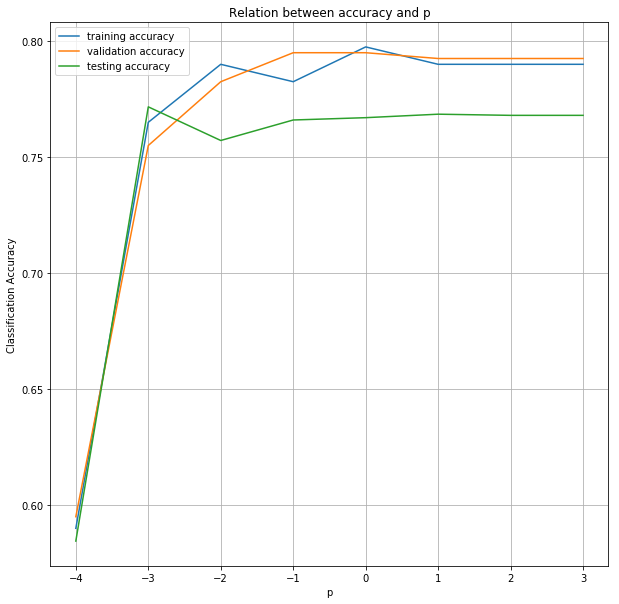

For p= -4
Training accuracy: 0.59
Validation accuracy: 0.595
Testing accuracy: 0.5845
For p= -3
Training accuracy: 0.765
Validation accuracy: 0.755
Testing accuracy: 0.7716666666666666
For p= -2
Training accuracy: 0.79
Validation accuracy: 0.7825
Testing accuracy: 0.7571666666666667
For p= -1
Training accuracy: 0.7825
Validation accuracy: 0.795
Testing accuracy: 0.766
For p= 0
Training accuracy: 0.7975
Validation accuracy: 0.795
Testing accuracy: 0.767
For p= 1
Training accuracy: 0.79
Validation accuracy: 0.7925
Testing accuracy: 0.7685
For p= 2
Training accuracy: 0.79
Validation accuracy: 0.7925
Testing accuracy: 0.768
For p= 3
Training accuracy: 0.79
Validation accuracy: 0.7925
Testing accuracy: 0.768


In [10]:
# Your code here

p_list = [-4, -3, -2, -1, 0, 1, 2, 3]

accuracy_tr = []
accuracy_val = []
accuracy_test = []

for p in p_list:
    clf = svm.SVC(kernel='poly',C=10**p, degree=2).fit(Xtr, ytr)
    accuracy_tr.append(clf.score(Xtr, ytr))
    accuracy_val.append(clf.score(Xval, yval))
    accuracy_test.append(clf.score(Xtest, ytest))

fig, ax = plt.subplots(figsize = (10,10))
plt.plot(p_list, accuracy_tr, label='training accuracy')
plt.plot(p_list, accuracy_val, label='validation accuracy')
plt.plot(p_list, accuracy_test, label='testing accuracy')
plt.xlabel("p")
plt.title("Relation between accuracy and p")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.grid()
plt.show()

for i in range(len(p_list)):
    print('For p=', p_list[i])
    print('Training accuracy:', accuracy_tr[i])
    print('Validation accuracy:', accuracy_val[i])
    print('Testing accuracy:', accuracy_test[i])

In [11]:
C_choose = 1 #choose p=0

Xtr_new = np.vstack((Xtr, Xval))
ytr_new = np.hstack((ytr, yval))

clf  = svm.SVC(kernel='poly',C=C_choose, degree=2).fit(Xtr_new, ytr_new)

print('New training accuracy:', clf.score(Xtr_new, ytr_new))
print('New testing accuracy:', clf.score(Xtest, ytest))

New training accuracy: 0.79375
New testing accuracy: 0.7771666666666667
